In [1]:
import datetime
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data IO Infra

In [2]:
# Constants for data analysis
DATA_BASE_DIR = '/home/hua/Downloads/dpdump30m'

In [3]:
def get_pandas_df_by_date(dt=datetime.date(2009, 4, 1)):
    """
    Input: datetime as datatime.date(year, month, day)
    Output: Pandas dataframe
    """
    date_str = dt.strftime("%Y/%m/%d")
    d = None
    for x in os.walk(DATA_BASE_DIR):
        if date_str in x[0]:
            d = x[0]
            break
    file_name = 'data.csv.gz'
    file_path = f"{d}/{file_name}"
    try:
        df = pd.read_csv(file_path, compression='gzip', header=0, sep=',', quotechar='"')
        return df
    except Exception as e:
        print(f"Error to loading {file_path}: {e}")
        return None

In [4]:
df = get_pandas_df_by_date(datetime.date(2009, 4, 2))
df.head(5)

,id,DateTime,y,w,r_0,dv_0,r_1,dv_1,r_2,dv_2,...,f_3,f_4,f_5,f_6,f_7,f_8,f_9,industry,beta,indbeta
0,1000001,2009-04-02 10:00:00.000000,0.006874,29474.115761,0.019806,110386236.0,-0.005798,56813927.0,-0.005734,85831896.0,...,1.027,0.193,2.050,-0.128,0.687,1.944,-0.391,27,1.060912,1.053313
1,1000002,2009-04-02 10:00:00.000000,0.005353,40803.436681,0.011089,599170347.0,-0.002700,231904770.0,-0.009251,446610733.0,...,-0.183,0.141,0.518,-0.089,0.836,2.209,-0.454,29,0.914805,1.082596
2,1000004,2009-04-02 10:00:00.000000,-0.000717,10777.457984,-0.003636,16699391.0,-0.000882,15124315.0,-0.014402,19855507.0,...,-1.284,0.258,0.263,-0.739,-0.970,0.782,0.813,29,0.968378,1.029156
3,1000008,2009-04-02 10:00:00.000000,-0.015881,19321.303490,0.013354,57878344.0,-0.008804,62445726.0,-0.011629,43780818.0,...,-0.715,2.028,0.179,-0.972,0.679,2.179,0.971,10,1.144523,1.501492
4,1000011,2009-04-02 10:00:00.000000,-0.006656,21016.687538,0.004915,78299803.0,-0.002639,48044863.0,0.003662,50800386.0,...,-0.312,1.905,0.375,-0.797,0.412,1.422,0.607,3,1.247694,0.869304


# Data Analysis
## Time versus features
### Single stock single day
### Single stock multiple days
### Multiple stocks multiple days

In [5]:
def get_pandas_df_ts_vs_var_point(dt, stock_id, var_name_list):
    try:
        df = get_pandas_df_by_date(dt)
        ts_df = df[df.id == stock_id][var_name_list+['DateTime']].set_index('DateTime')
        return ts_df
    except Exception as e:
        print(f"Error to filter id, {var_name_list} from df[{dt}]: {e}")
        return None

def get_pandas_df_ts_vs_var_range(dt_start, dt_end, stock_id, var_name_list, draw=False):
    ts_df_list = []
    delta = datetime.timedelta(days=1)
    dt = dt_start
    while dt <= dt_end:
        #print(f"Processing {dt}...")
        tmp_ts_df = get_pandas_df_ts_vs_var_point(dt, stock_id, var_name_list)
        if tmp_ts_df is not None:
            ts_df_list.append(tmp_ts_df)
        else:
            print(f"Missing data point: {dt}")
        #print(f"Processed {dt}!")
        dt += delta
    ts_df = pd.concat(ts_df_list)
    if draw:
        cnt = len(var_name_list)
        title_list = [f"Stock ID: {stock_id}, Ts on {var_name}, {dt_start} to {dt_end}" for var_name in var_name_list]
        axes = ts_df[var_name_list].plot(marker='.', alpha=0.5, linestyle='None', figsize=(4*cnt, 3*cnt), title=title_list, subplots=True)
        for ax in axes:
            ax.set_ylabel('Y axis')
    return ts_df

Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'w'] from df[2009-04-04]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-04
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'w'] from df[2009-04-05]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-05
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'w'] from df[2009-04-06]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-06
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'w'] from df[2009-04-11]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-11
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'w'] from df[2009-04-12]: '

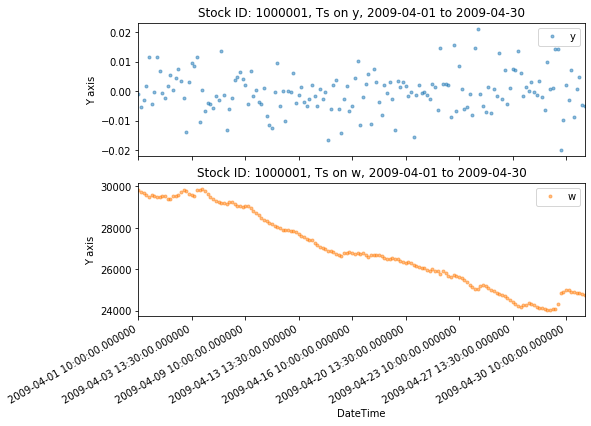

In [6]:
ts_df = get_pandas_df_ts_vs_var_range(datetime.date(2009, 4, 1), datetime.date(2009, 4, 30),
                                      1000001,
                                      ['y', 'w'],
                                      True)

Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'r_0', 'dv_0', 'r_1', 'dv_1'] from df[2009-04-04]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-04
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'r_0', 'dv_0', 'r_1', 'dv_1'] from df[2009-04-05]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-05
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'r_0', 'dv_0', 'r_1', 'dv_1'] from df[2009-04-06]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-06
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'r_0', 'dv_0', 'r_1', 'dv_1'] from df[2009-04-11]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-11
Error to loading None/data.csv.gz: [Errno 2]

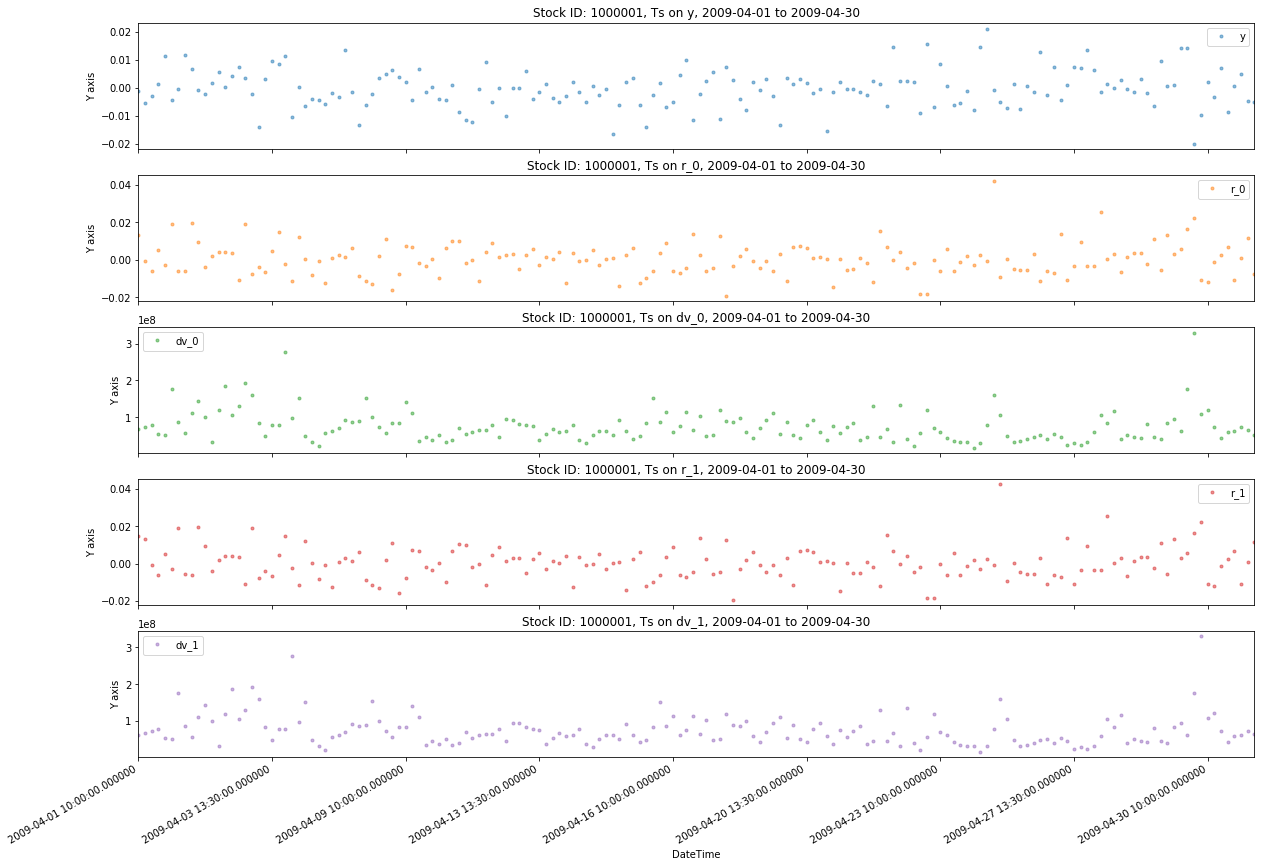

In [7]:
ts_df = get_pandas_df_ts_vs_var_range(datetime.date(2009, 4, 1), datetime.date(2009, 4, 30),
                                      1000001,
                                      ['y', 'r_0', 'dv_0', 'r_1', 'dv_1'],
                                      True)

Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'] from df[2009-04-04]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-04
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'] from df[2009-04-05]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-05
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'] from df[2009-04-06]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-06
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6

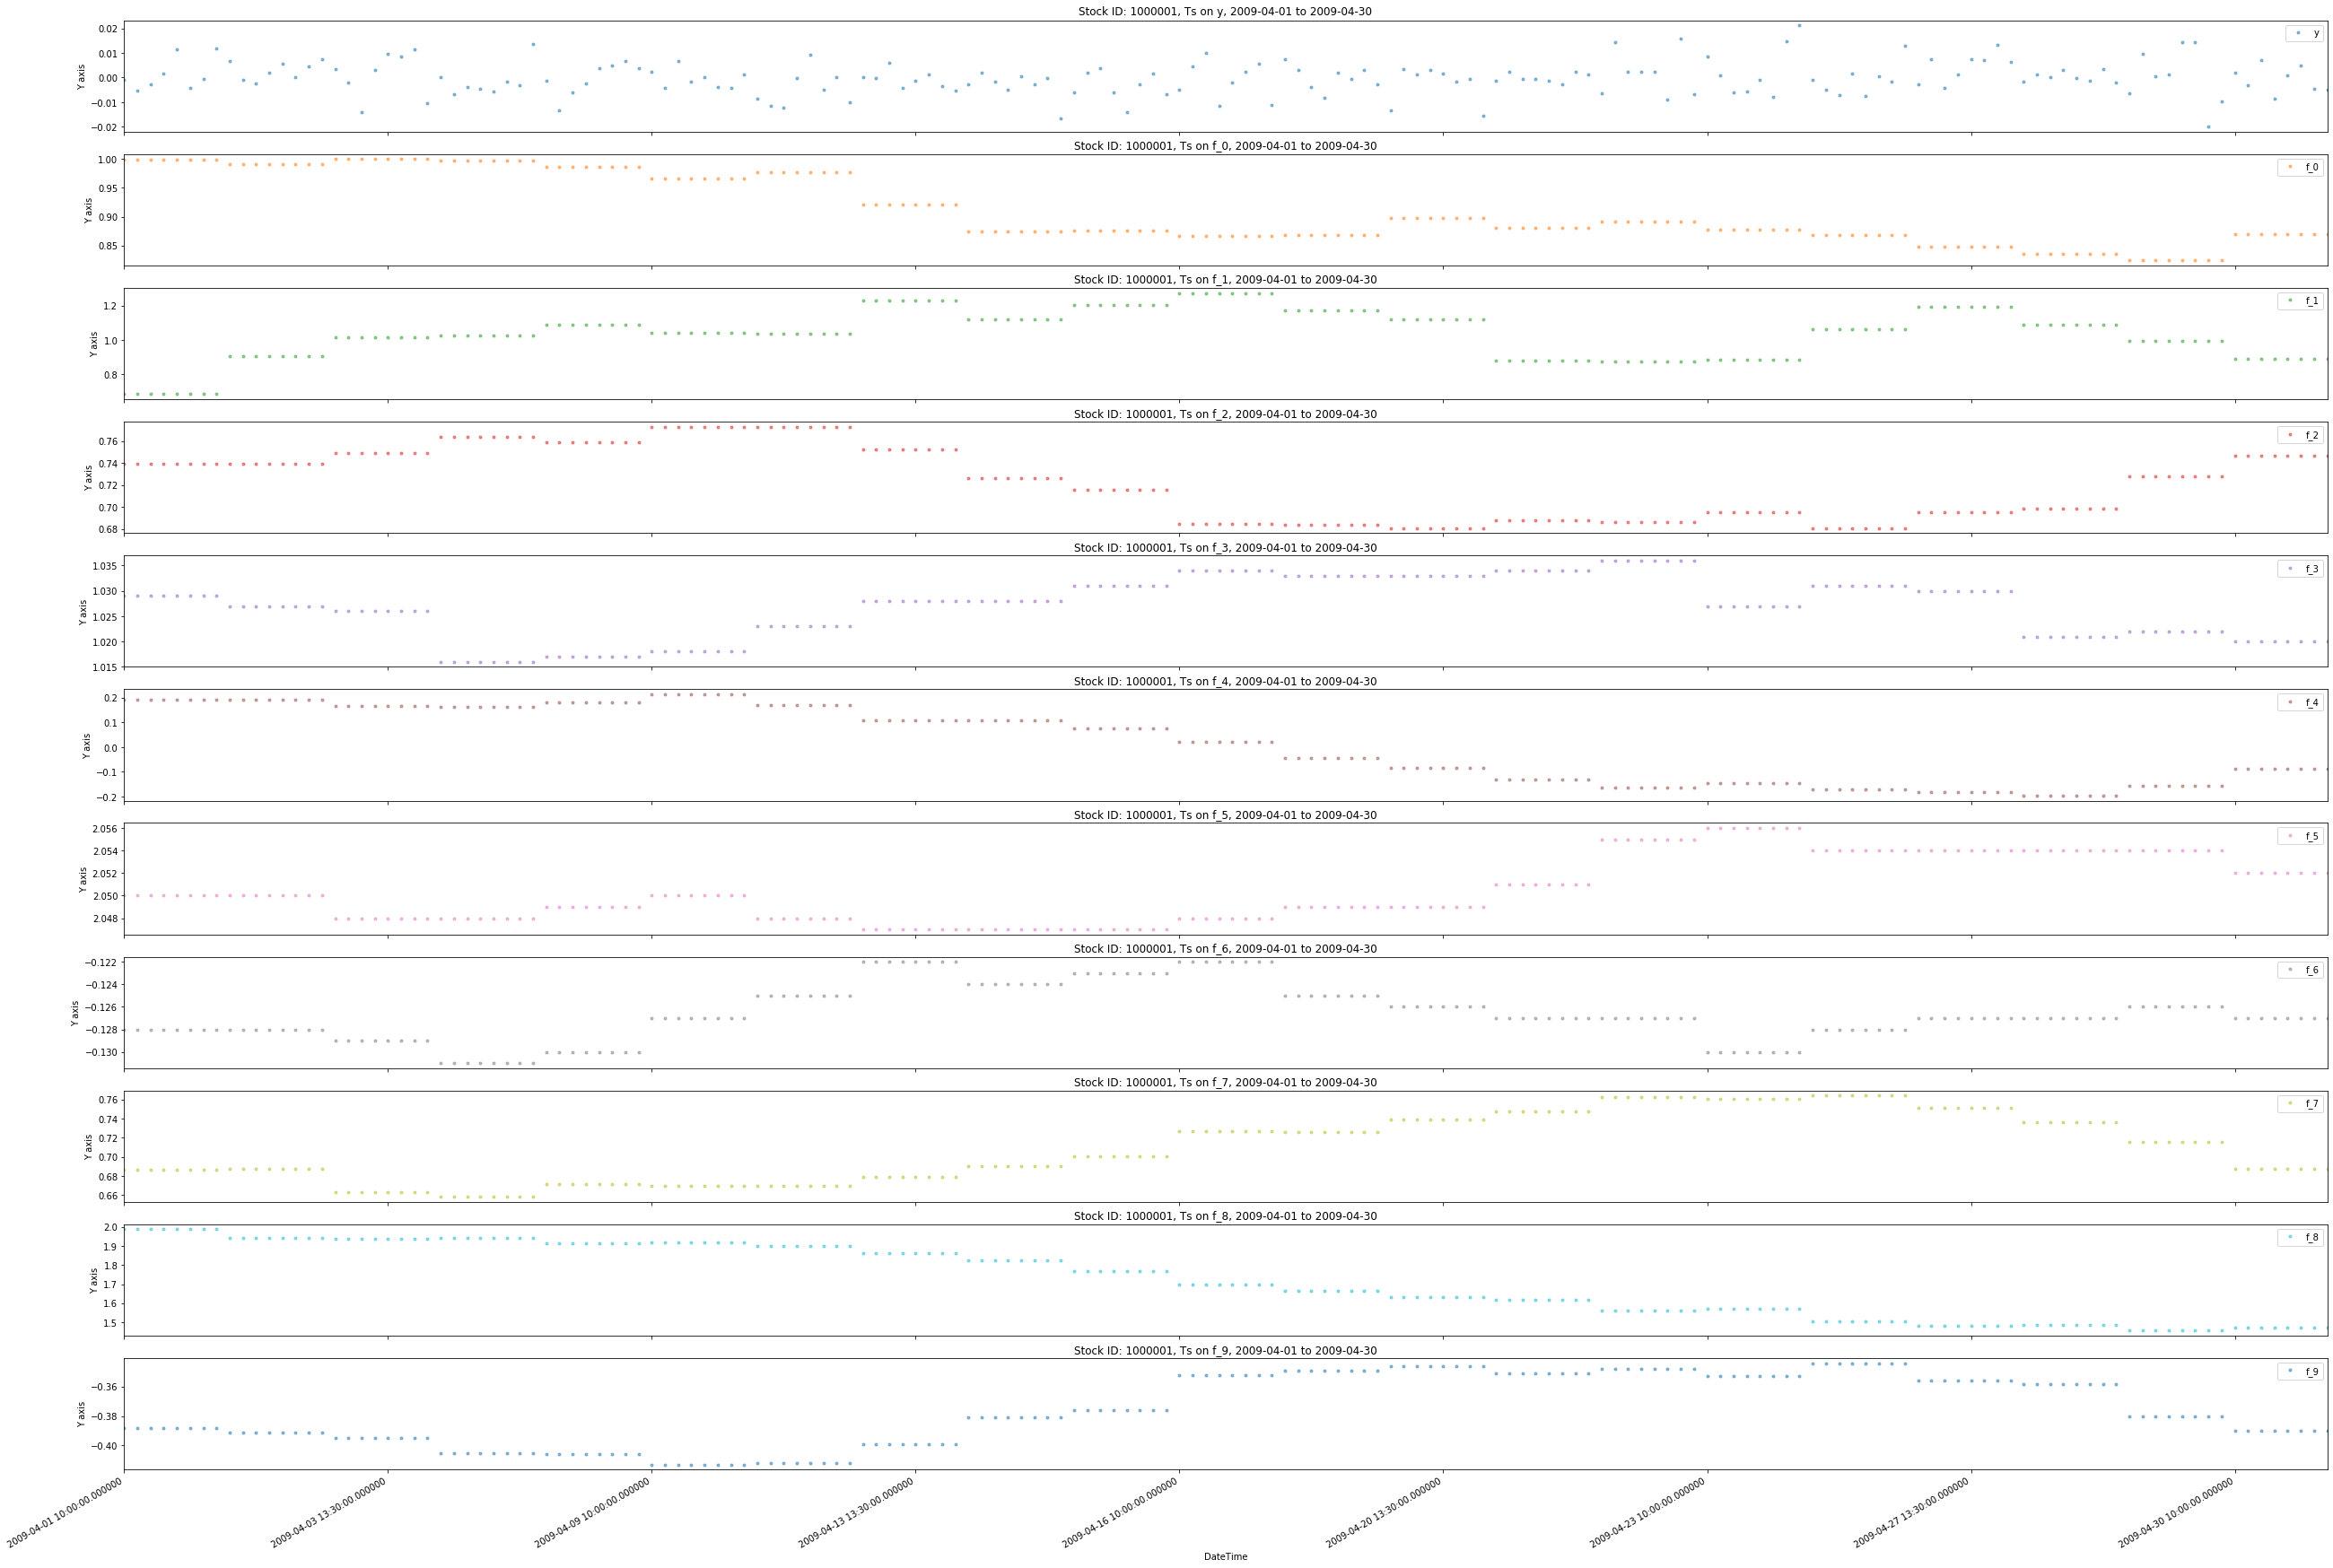

In [8]:
ts_df = get_pandas_df_ts_vs_var_range(datetime.date(2009, 4, 1), datetime.date(2009, 4, 30),
                                      1000001,
                                      ['y', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9'],
                                      True)

Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'beta', 'indbeta'] from df[2009-04-04]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-04
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'beta', 'indbeta'] from df[2009-04-05]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-05
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'beta', 'indbeta'] from df[2009-04-06]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-06
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.gz'
Error to filter id, ['y', 'beta', 'indbeta'] from df[2009-04-11]: 'NoneType' object has no attribute 'id'
Missing data point: 2009-04-11
Error to loading None/data.csv.gz: [Errno 2] No such file or directory: 'None/data.csv.g

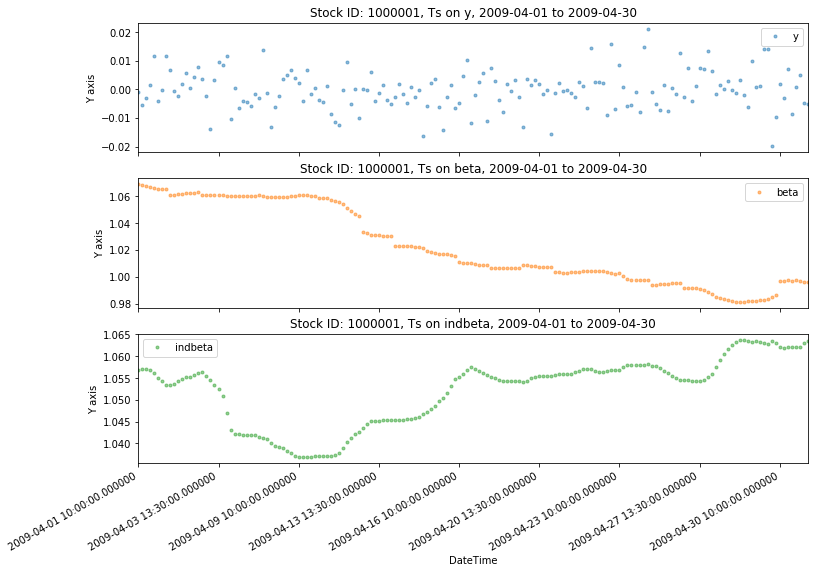

In [9]:
ts_df = get_pandas_df_ts_vs_var_range(datetime.date(2009, 4, 1), datetime.date(2009, 4, 30),
                                      1000001,
                                      ['y', 'beta', 'indbeta'],
                                      True)

# End of Notebook